<a href="https://colab.research.google.com/github/gp201/Skipgram/blob/master/skipgram_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#Genism
from gensim.models import Word2Vec
from smart_open import open
import os

#Tensor
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from matplotlib import pyplot

#NLTK
import numpy as np 
import string 
import nltk
from nltk.corpus import stopwords

install.packages("ggfortify")
library("ggfortify")

NameError: ignored

In [0]:
#File open & Read
file = open("data.txt",mode='r')
file.seek(0,0)
str = file.readlines()

In [0]:
import re
def preprocessing2(corpus):
  training_data = []
  for i in range(len(str)):
    regex = re.compile(r'[\n\r\t]')
    str[i] = regex.sub(" ", str[i])
    check = str[i].split()
    check.pop(1)
    check.pop(1)
    check.pop(0)
    check.pop(-1)
    check = [word.lower() for word in check] 
    training_data.append(check) 
  return training_data

In [36]:
str = preprocessing2(str)
#print(str)
str

[['dctn4', 't116,t123'],
 ['chronic', 'pseudomonas', 'aeruginosa', 'infection', 't047'],
 ['cystic', 'fibrosis', 't047'],
 ['pseudomonas', 'aeruginosa', '(pa)', 'infection', 't047'],
 ['cystic', 'fibrosis', 't047'],
 ['cf', 't047'],
 ['patients', 't101'],
 ['long-term', 't079'],
 ['pulmonary', 'disease', 't047'],
 ['shorter', 'survival', 't169'],
 ['chronic', 'pa', 'infection', 't047'],
 ['cpa', 't047'],
 ['reduced', 'lung', 'function', 't033'],
 ['faster', 'rate', 'of', 'lung', 'decline', 't033'],
 ['rates', 't081'],
 ['exacerbations', 't033'],
 ['shorter', 'survival', 't169'],
 ['exome', 'sequencing', 't063'],
 ['extreme', 'phenotype', 'design', 't052'],
 ['isoforms', 't116'],
 ['dynactin', '4', 't116,t123'],
 ['dctn4', 't116,t123'],
 ['pa', 'infection', 't047'],
 ['cf', 't047'],
 ['respiratory', 'disease', 't047'],
 ['study', 't062'],
 ['investigate', 't169'],
 ['dctn4', 't116,t123'],
 ['missense', 't033'],
 ['variants', 't116'],
 ['pa', 'infection', 't047'],
 ['incidence', 't081'],

In [0]:
model = Word2Vec(str, min_count=1, size=256,sg = 1 ,iter=20000)

In [38]:
words = list(model.wv.vocab)
print(words)

['dctn4', 't116,t123', 'chronic', 'pseudomonas', 'aeruginosa', 'infection', 't047', 'cystic', 'fibrosis', '(pa)', 'cf', 'patients', 't101', 'long-term', 't079', 'pulmonary', 'disease', 'shorter', 'survival', 't169', 'pa', 'cpa', 'reduced', 'lung', 'function', 't033', 'faster', 'rate', 'of', 'decline', 'rates', 't081', 'exacerbations', 'exome', 'sequencing', 't063', 'extreme', 'phenotype', 'design', 't052', 'isoforms', 't116', 'dynactin', '4', 'respiratory', 'study', 't062', 'investigate', 'missense', 'variants', 'incidence', 'age', 't032', 'cohort', 't098', 'adult', 't100', 'centre', 't073,t093', 'polymerase', 'chain', 'reaction', 'direct', 'dna', 'samples', 't026', 'cochin', 'hospital', 'cftr', 't028', 'defects', 't007', 'p.tyr263cys', 'male', 'class', 'ii', 'mutations', 't045', 'pathogenesis', 't046']


In [39]:
model.save("word2vec.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [40]:
model.similar_by_word("t047")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('infection', 0.49662041664123535),
 ('t007', 0.4880439043045044),
 ('aeruginosa', 0.4872242212295532),
 ('pseudomonas', 0.4801626205444336),
 ('pulmonary', 0.4680863320827484),
 ('chronic', 0.4596545100212097),
 ('(pa)', 0.43889376521110535),
 ('disease', 0.42859381437301636),
 ('t073,t093', 0.4224052429199219),
 ('centre', 0.39202654361724854)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


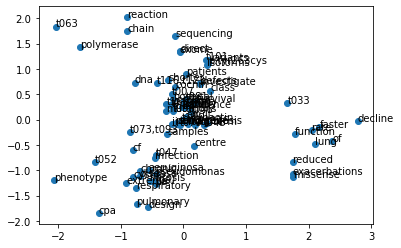

In [41]:
# PCA plotting for model
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [42]:
model.similarity("pseudomonas","t007")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.25250864

In [0]:
#Tagged Corpus Reader Ref 
 
 
 from nltk.corpus.reader import TaggedCorpusReader 
 sent = ''' The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./. '''

In [30]:
#Tagged Corpus Reader Ref 
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

In [31]:
#Tagged Corpus Reader Ref 
from nltk.tokenize import LineTokenizer 

x = TaggedCorpusReader('.', r'.*\.pos',sent_tokenizer = LineTokenizer()) 
  
x.sents() 

ValueError: ignored

In [19]:
info = {}
for i in str:
  key = i[-1]
  if key in info.keys():
    values = []
    values = info[key]
    if dict[key] = i[:-1]:
      values.append(i[:-1])
    info[key] = values
  else:
    info[key] = i[:-1]
info

SyntaxError: ignored